<a href="https://colab.research.google.com/github/Mokrytskyi/PyTorch/blob/main/excercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Excersises 

# Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

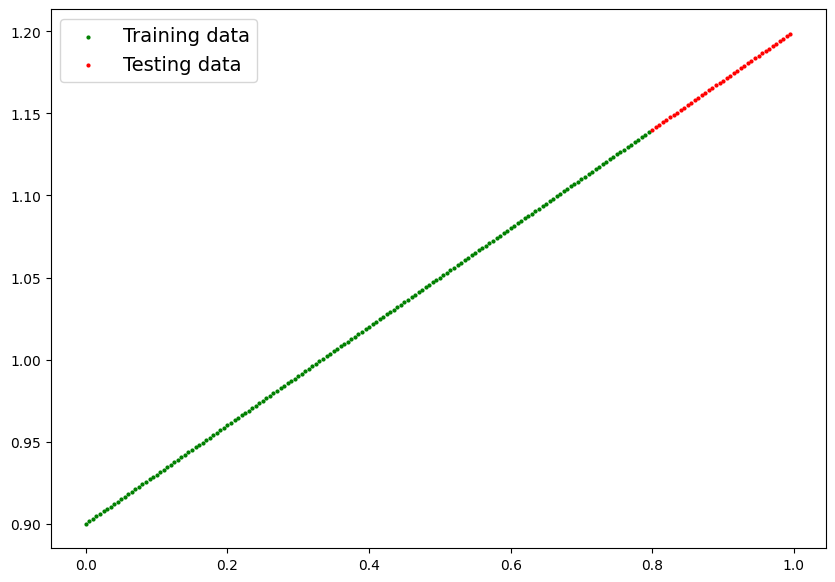

In [48]:
import torch
import matplotlib.pyplot as plt

weight = 0.3
bias = 0.9

start = 0
stop = 1
split = 0.005

X = torch.arange(start,stop,split).unsqueeze(dim=1)


y = weight * X + bias

# split
split_data = int(0.8 * len(X))
X_train , y_train = X[:split_data], y[:split_data]
X_test , y_test = X[split_data:], y[split_data:]

len(X_train), len(y_train), len(X_test), len(y_test)

# Plot
def plot_pred(train_data = X_train ,
              train_labels = y_train ,
              test_data = X_test ,
              tets_labels = y_test ,
              predictions = None):
  plt.figure(figsize=(10,7))

  #Plot train data in green
  plt.scatter(train_data,train_labels,c="green",s=4,label="Training data")

  #Plot test data in red
  plt.scatter(test_data,tets_labels,c="red",s=4,label="Testing data")

  # Making predictions
  if predictions is not None:
    plt.scatter(test_data,predictions,c="blue",s=4,label="Testing data")

  plt.legend(prop={"size":"14"})

plot_pred()


### Build a PyTorch model by subclassing nn.Module.
* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its state_dict().
* Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [49]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_func = nn.Linear(in_features=1,
                            out_features=1)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_func(x)

torch.manual_seed(1)
model = LinearRegressionModel()



###Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.


In [52]:
torch.manual_seed(1)

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.001)

epochs = 30000

for epoch in range(epochs):
  model.train()

  y_pred = model(X_train)

  loss = loss_fn(y_train,y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  if epoch % 2000 == 0:
    model.eval()

    with torch.inference_mode():
      test_pred = model(X_test)

      test_loss = loss_fn(y_test,test_pred)

    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Train loss: 0.0004888121038675308 | Test loss: 0.0010508715640753508
Epoch: 2000 | Train loss: 0.0004888121038675308 | Test loss: 0.0010508715640753508
Epoch: 4000 | Train loss: 0.0004888121038675308 | Test loss: 0.0010508715640753508
Epoch: 6000 | Train loss: 0.0004888121038675308 | Test loss: 0.0010508715640753508
Epoch: 8000 | Train loss: 0.0004888121038675308 | Test loss: 0.0010508715640753508
Epoch: 10000 | Train loss: 0.0004888121038675308 | Test loss: 0.0010508715640753508
Epoch: 12000 | Train loss: 0.0004888121038675308 | Test loss: 0.0010508715640753508
Epoch: 14000 | Train loss: 0.0004888121038675308 | Test loss: 0.0010508715640753508
Epoch: 16000 | Train loss: 0.0004888121038675308 | Test loss: 0.0010508715640753508
Epoch: 18000 | Train loss: 0.0004888121038675308 | Test loss: 0.0010508715640753508
Epoch: 20000 | Train loss: 0.0004888121038675308 | Test loss: 0.0010508715640753508
Epoch: 22000 | Train loss: 0.0004888121038675308 | Test loss: 0.0010508715640753508



### Make predictions with the trained model on the test data.

* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).


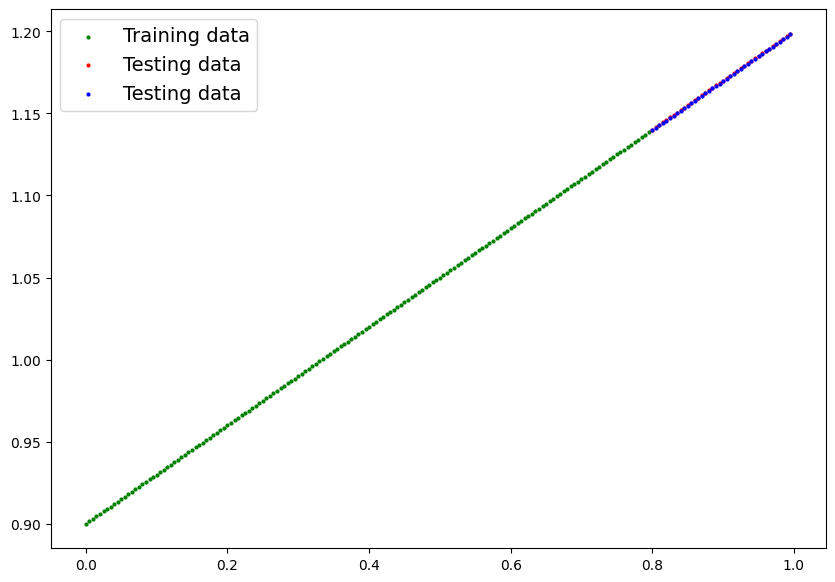

In [53]:
with torch.inference_mode():
  y_pred = model(X_test)

plot_pred(predictions=y_pred)


###Save your trained model's state_dict() to file.

* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.


In [56]:
from functools import total_ordering
from pathlib import Path

# Save
model_path = Path("models")
model_path.mkdir(parents=True,exist_ok=True)

file_name = "01_excercise_torch_workflow.pth"
save_path = model_path / file_name

torch.save(obj=model.state_dict(),
           f=file_name)

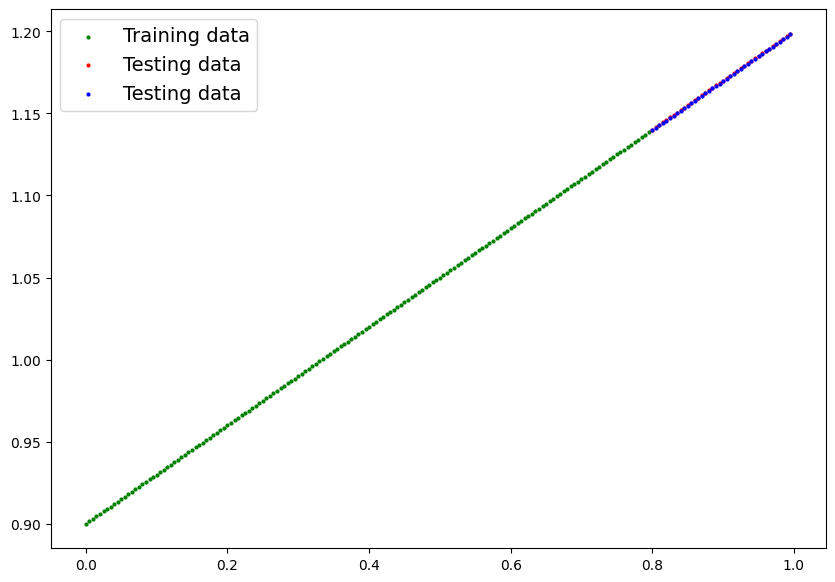

In [59]:
# Load 
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(file_name))

with torch.inference_mode():
  y_loaded_pred = loaded_model(X_test)

plot_pred(predictions=y_loaded_pred)